Copied example from Example-1 and made own processing to extract all numbers used in each item

-Shayne M. Plourde

## Punchline:

percentage of news with numbers that are true for kaggle_df: 

37.42458914083628 percent



percentage of news with numbers in title that are true for liar_df: 

55.13203786746388 percent

# Read in datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Read in LIAR dataset columns 1 and 2 only:
liar_df = pd.read_csv('../Datasets/liar_dataset/train.tsv', sep='\t',header=None, usecols = [1,2], names=["Label", "Statement"])
liar_df['Truth'] = liar_df.Label.map({
    'pants-fire': 0,
    'false': 0,
    'mostly-false': 0,
    'half-true': 0,
    'barely-true': 1,
    'mostly-true': 1,
    'true': 1
})


In [3]:

# Read in Kaggle titles only. The dataframe df_kaggle has two columns: article titles, and (true/false).
kaggle_df_true = pd.read_csv('../Datasets/kaggle/True.csv', usecols = [0])
kaggle_df_fake = pd.read_csv('../Datasets/kaggle/Fake.csv', usecols = [0])
kaggle_df_true['Truth'] = 1
kaggle_df_fake['Truth'] = 0
kaggle_df = pd.concat([kaggle_df_true, kaggle_df_fake], ignore_index=True, sort=False)

In [4]:
liar_df['Numbs'] = liar_df.Statement.str.findall(r'(\d+(?:\.\d+)?)')
liar_df['UsesNumbs'] = 0
liar_df.loc[liar_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
liar_df.sample(5)

,Label,Statement,Truth,Numbs,UsesNumbs
3849,barely-true,The Greenest County in America.,1,[],0
1051,pants-fire,The economy began its nose dive when Democrats...,0,[2007],1
9776,barely-true,"Says that even if you have no children, under ...",1,[],0
10155,true,"The day President Obama took office, gasoline ...",1,[1.79],1
9941,half-true,We have $60 billion in 2010 in Medicare fraud.,0,"[60, 2010]",1


In [5]:
kaggle_df['Numbs'] = kaggle_df.title.str.findall(r'(\d+(?:\.\d+)?)')
kaggle_df['UsesNumbs'] = 0
kaggle_df.loc[kaggle_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
kaggle_df.sample(5)

,title,Truth,Numbs,UsesNumbs
28989,Chumlee From ‘Pawn Stars’ Arrested In Las Veg...,0,[20],1
31146,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,0,[],0
6597,Putin says wants constructive relations with T...,1,[],0
24490,Trump Spokeswoman HUMILIATES Herself While Tr...,0,[],0
32273,CHECKMATE! PUTIN Offers Up Proof Of Trump’s In...,0,[],0


Label
barely-true    620
false          637
half-true      928
mostly-true    909
pants-fire     236
true           684
Name: UsesNumbs, dtype: int64

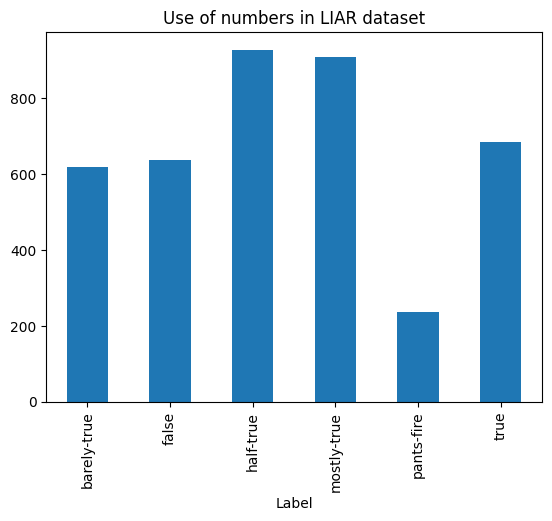

In [6]:
#count usesNumbs for each label AND PLOT
liar_df.groupby('Label')['UsesNumbs'].sum().plot(kind='bar')
#TITLE use of numbers
plt.title('Use of numbers in LIAR dataset')
liar_df.groupby('Label')['UsesNumbs'].sum()

Truth
0    3008
1    1799
Name: UsesNumbs, dtype: int64

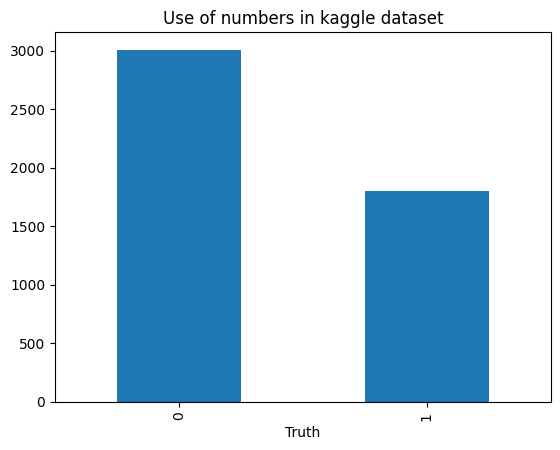

In [7]:
kaggle_df.groupby('Truth')['UsesNumbs'].sum().plot(kind='bar')
#TITLE use of numbers
plt.title('Use of numbers in kaggle dataset')
kaggle_df.groupby('Truth')['UsesNumbs'].sum()

In [8]:
#count of numbers in all lists in Numbs column for liar_df for Truth
print('percentage of news with numbers in title that are true for liar_df: ')
print(100*liar_df[liar_df['Truth'] == 1]['UsesNumbs'].sum() / liar_df['UsesNumbs'].sum(), 'percent')


percentage of news with numbers in title that are true for liar_df: 
55.13203786746388 percent


In [9]:
print('percentage of news with numbers that are true  in title for kaggle_df: ')
print(100*kaggle_df[kaggle_df['Truth'] == 1]['UsesNumbs'].sum() / kaggle_df['UsesNumbs'].sum(), 'percent')

percentage of news with numbers that are true  in title for kaggle_df: 
37.42458914083628 percent
